<a href="https://colab.research.google.com/github/Yogesh8010/Yogesh8010/blob/main/k_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-NEAREST NEIGHBOUR

REQUIRED LIBRARIES

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2024-02-29 06:35:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.01s   

2024-02-29 06:35:27 (2.37 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



load data from csv file


In [ ]:
 df = pd.read_csv('teleCust1000t.csv')

In [ ]:
df = pd.read_csv('teleCust1000t.csv')
df.head(300)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,50,52,0,30,214.0,3,22,0.0,0,1,4
296,2,28,40,0,7,64.0,1,19,0.0,0,1,3
297,3,34,51,0,8,50.0,4,14,0.0,0,1,1
298,1,48,32,0,2,88.0,3,9,0.0,0,1,4


Data visualization AND Analysis

In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

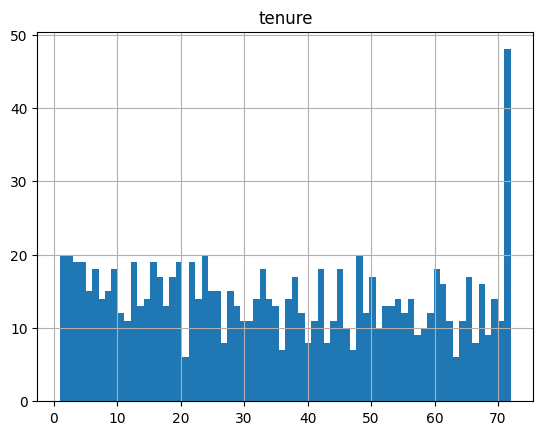

In [ ]:
df.hist(column='tenure',bins=70)

array([[<Axes: title={'center': 'address'}>]], dtype=object)

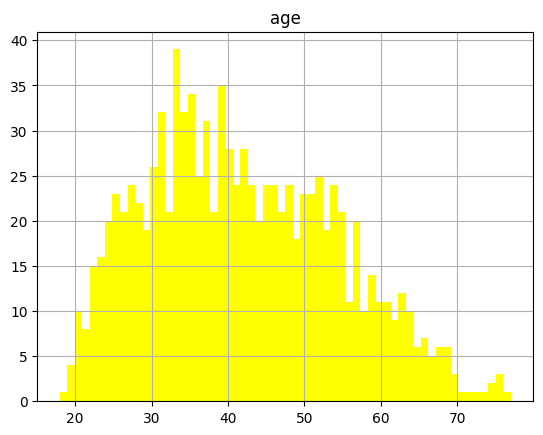

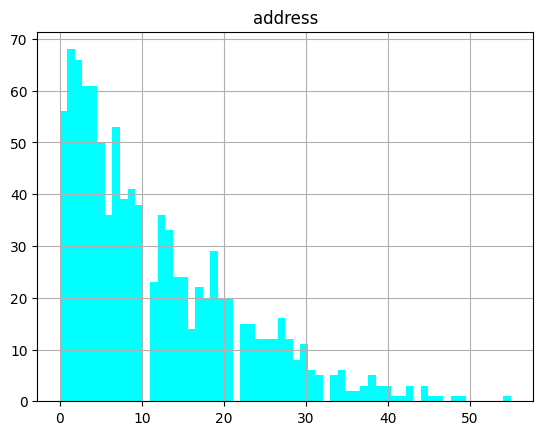

In [ ]:
df.hist(column='age',bins=60,color='yellow')
df.hist(column='address',bins=60,color='cyan')

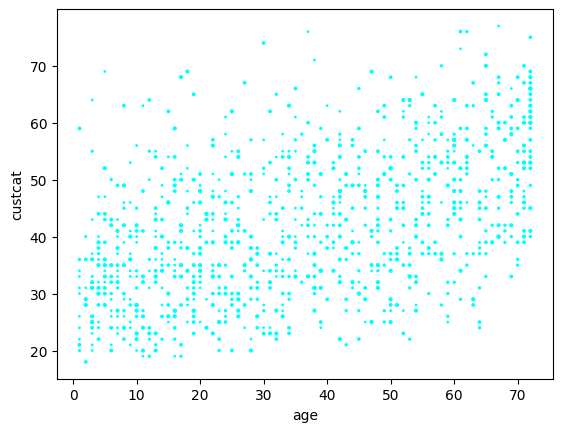

In [ ]:
plt.scatter( df.tenure,df.age,df.custcat,color='cyan')
plt.xlabel("tenure")
plt.ylabel("custcat")
plt.xlabel("age")
plt.ylabel("custcat")

plt.show()

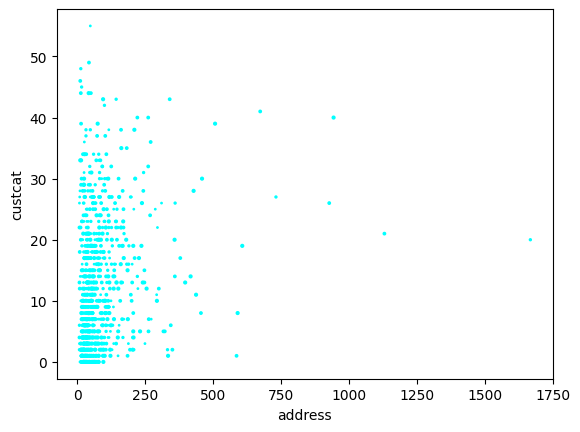

In [ ]:
plt.scatter( df.income,df.address,df.custcat,color='cyan')
plt.xlabel("income")
plt.xlabel("address")
plt.ylabel("custcat")

plt.show()

feature set

Define Feature Sets,X

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library,we have to convert the pandas data frame to a numpy array#

In [ ]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values#.astype
X[0:11]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.],
       [  2.,   5.,  33.,   0.,  10., 125.,   4.,   5.,   0.,   1.,   1.]])

Define Y

In [ ]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

Used to standardscaler

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Train Test Speed

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.14, random_state=4)
print('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (860, 11) (860,)
Test set: (140, 11) (140,)


import library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Training Model and Predict K=1 to 10

In [ ]:
k = 1
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [ ]:
k = 2
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

In [ ]:
k = 3
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [ ]:
k = 4
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
k = 5
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [ ]:
k = 6
#Train model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([3, 3, 3, 4, 4, 3, 4, 4, 2, 1])